<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/04RetiNeurali/02ReteConvoluzionale/mnist_keras_conv01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST in Keras Convoluzionale
## Esercizio 1
**Author: Cristiano Casadei**

In [1]:
from random import randint

import matplotlib.pyplot as plt
import numpy
from tensorflow.python.keras import Input, Model
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.python.keras.utils import np_utils

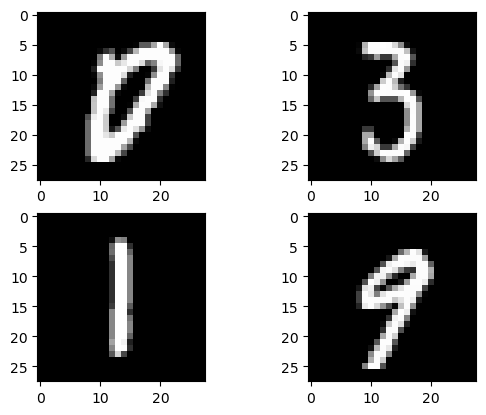

In [2]:
# ottengo il dataset MNIST già suddiviso in dataset X e Y, di addestramento e di test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# visualizzo 4 cifre random
for i in range(4):
    plt.subplot(2, 2, (i + 1))
    # in 'shape[0]' è contenuto il numero di esempi del dataset (in questo caso di addestramento)
    plt.imshow(X_train[randint(0, X_train.shape[0])], cmap=plt.get_cmap('gray'))

In [3]:
# imposto un seed random in modo da ottenere risultati replicabili, d'ora in avanti
numpy.random.seed(1234)

# modifico le matrici di pixel in modo da ottenere una matrice di pixels monocromatici
# usando Tensorflow, il canale del colore è l'ultimo dopo le dimensioni (ncifre, dimy, dimx, ncanalicolore)
# con altri backend (ad esempio Theano) il canale va prima delle dimensioni (ncifre, ncanalicolore, dimy, dimx)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalizzo i valori dei pixel portandoli dal range intero 0-255 al range in virgola mobile 0.0-1.0
# visto che sono array numpy, è sufficiente eseguire l'operazione direttamente sull'array
X_train = X_train / 255
X_test = X_test / 255

# modifico gli array dei risultati ("ground truth") in modo siano in formato 'one hot encode'
# quindi i valori interi corrispondenti alla classe della cifra (0, 1, 2, ..., 9) vengono
# codificati in stringhe posizionali di 0 ed 1
# esempi:
#   0 --> 1,0,0,0,0,0,0,0,0,0
#   1 --> 0,1,0,0,0,0,0,0,0,0
#   2 --> 0,0,1,0,0,0,0,0,0,0
#  ....
#   9 --> 0,0,0,0,0,0,0,0,0,1
# in questo modo è più semplice ottenere un risultato significativo dalla rete neurale, in quanto
# ogni cifra posizionale corrisponderà ad un neurone dello strato di output che si attiverà o meno
# a seconda del risultato della classificazione della rete neurale
# in 'shape[0]' continuerà ad essere contenuto il numero di cifre del dataset
# in 'shape[1]' ci sarà invece il numero di cifre posizionali, corrispondente al numero di classi possibili
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classi = y_train.shape[1]

In [4]:
# definisco un modello di rete neurale convoluzionale
# come dimensione del layer di ingresso uso quelle del train set (esclusa la dimensione iniziale del numero di cifre del dataset)
input_layer = Input(shape=X_train.shape[1:], name="input_layer")
inner_layer = Conv2D(32, (5, 5), activation="relu", name="conv_layer")(input_layer)
inner_layer = MaxPooling2D(pool_size=(2, 2), name="maxpool_layer")(inner_layer)
inner_layer = Dropout(rate=0.2, name="drop_layer")(inner_layer)
inner_layer = Flatten(name="flatten_layer")(inner_layer)
inner_layer = Dense(128, activation="relu", name="dense_layer")(inner_layer)
output_layer = Dense(num_classi, activation="softmax", name="output_layer")(inner_layer)

model = Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_layer (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
maxpool_layer (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
drop_layer (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 4608)              0         
_________________________________________________________________
dense_layer (Dense)          (None, 128)               589952    
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290  

2022-12-19 09:04:31.469061: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:04:31.473972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:04:31.474124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 09:04:31.474665: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [5]:
# compilo il modello indicando che tipo di loss_function devo utilizzare,
# il tipo di ottimizzatore e le metriche che voglio vengano calcolate
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# addestro il modello
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=10, batch_size=256, verbose=1)

2022-12-19 09:04:41.487542: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-12-19 09:04:44.720964: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101
2022-12-19 09:04:48.888403: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-19 09:04:48.888861: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-19 09:04:48.888893: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2022-12-19 09:04:48.889269: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-19 09:04:48.889330: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


235/235 [==============================] - 11s 6ms/step - loss: 0.2580 - accuracy: 0.9266 - val_loss: 0.0751 - val_accuracy: 0.9778
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0724 - accuracy: 0.9789 - val_loss: 0.0528 - val_accuracy: 0.9833
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0388 - val_accuracy: 0.9875
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 0.0359 - val_accuracy: 0.9887
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0377 - val_accuracy: 0.9879
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0321 - val_accuracy: 0.9896
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.0294 - val_accuracy: 0.9908
Epoch 8/10
235/2

In [6]:
# valuto il modello
valutazioni = model.evaluate(X_test, y_test, verbose=1)
print("Errore del modello: {:.2f}%".format(100 - valutazioni[1] * 100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9889
Errore del modello: 1.11%
